In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
df = pd.read_csv("China_largest_companies.csv")
df

,Global Rank\t,Company\t,Sales ($billion)\t,Profits ($billion)\t,Assets ($billion)\t,Market Value ($billion)
0,1,ICBC,134.8,37.8,2813.5,237.3
1,2,China Construction Bank,113.1,30.6,2241.0,202.0
2,8,Agricultural Bank of China,103.0,23.0,2124.2,150.8
3,9,PetroChina,308.9,18.3,347.8,261.2
4,11,Bank of China,98.1,22.1,2033.8,131.7
...,...,...,...,...,...,...
130,1866,Qinghai Salt Lake,15.2,0.4,4.7,6.8
131,1906,Inner Mongolia Baotou Steel,6.8,0.1,7.9,6.4
132,1916,Shanghai Material Trading,12.8,0.0,1.5,0.3
133,1944,Tongling Nonferrous Metals,12.2,0.1,5.9,3.9


In [2]:
#info about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global Rank	             135 non-null    int64  
 1   Company	                 135 non-null    object 
 2   Sales ($billion)	        135 non-null    float64
 3   Profits ($billion)	      135 non-null    float64
 4   Assets ($billion)	       135 non-null    float64
 5   Market Value ($billion)  135 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [61]:
#columns, rows
df.shape

(135, 6)

In [60]:
#checking for duplicates in companies
df["Company\t"].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
130    False
131    False
132    False
133    False
134    False
Name: Company\t, Length: 135, dtype: bool

In [53]:
#Grouping
#Companies in the top 10 global rank
by_Rank = df.groupby(["Global Rank\t", "Company\t", "Market Value ($billion)", "Assets ($billion)\t"])["Company\t"].count().reset_index(name="count")
by_Rank = by_Rank.set_index("Global Rank\t")
by_Rank = by_Rank.sort_values("Global Rank\t", ascending = True)
by_Rank.head(4)

,Company\t,Market Value ($billion),Assets ($billion)\t,count
Global Rank,,,,
1,ICBC,237.3,2813.5,1
2,China Construction Bank,202.0,2241.0,1
8,Agricultural Bank of China,150.8,2124.2,1
9,PetroChina,261.2,347.8,1


In [54]:
#Top ten profitable companies
by_Profit = df.groupby(["Company\t", "Profits ($billion)\t", "Sales ($billion)\t", "Market Value ($billion)", "Assets ($billion)\t"])["Assets ($billion)\t"].count().reset_index(name="count")
by_Profit = by_Profit.sort_values("Profits ($billion)\t", ascending =False)
by_Profit = by_Profit.set_index("Profits ($billion)\t")
by_Profit.head(10)

,Company\t,Sales ($billion)\t,Market Value ($billion),Assets ($billion)\t,count
Profits ($billion),,,,,
37.8,ICBC,134.8,237.3,2813.5,1
30.6,China Construction Bank,113.1,202.0,2241.0,1
23.0,Agricultural Bank of China,103.0,150.8,2124.2,1
22.1,Bank of China,98.1,131.7,2033.8,1
18.3,PetroChina,308.9,261.2,347.8,1
10.1,Sinopec-China Petroleum,411.7,106.9,200.0,1
9.4,Bank of Communications,43.5,56.7,846.4,1
7.7,China Shenhua Energy,39.7,70.8,70.2,1
7.3,China Merchants Bank,28.4,44.1,547.0,1


In [55]:
#Top ten companies by sales
by_Sales = df.groupby(["Company\t", "Profits ($billion)\t","Sales ($billion)\t", "Market Value ($billion)"])["Sales ($billion)\t"].count().reset_index(name="count")
by_Sales = by_Sales.sort_values("Sales ($billion)\t", ascending=False)
by_Sales = by_Sales.set_index("Sales ($billion)\t")
by_Sales.head(10)

,Company\t,Profits ($billion)\t,Market Value ($billion),count
Sales ($billion),,,,
411.7,Sinopec-China Petroleum,10.1,106.9,1
308.9,PetroChina,18.3,261.2,1
134.8,ICBC,37.8,237.3,1
113.1,China Construction Bank,30.6,202.0,1
103.0,Agricultural Bank of China,23.0,150.8,1
98.1,Bank of China,22.1,131.7,1
76.7,China Railway Group,1.2,10.2,1
76.7,China State Construction,2.2,16.9,1
75.0,SAIC Motor,3.3,26.7,1


In [56]:
#Top ten companies by market value
by_Market_Value = df.groupby(["Company\t", "Market Value ($billion)", "Sales ($billion)\t", "Profits ($billion)\t", "Assets ($billion)\t"])["Assets ($billion)\t"].count().reset_index(name="count")
by_Market_Value = by_Market_Value.set_index("Market Value ($billion)")
by_Market_Value = by_Market_Value.sort_values("Market Value ($billion)", ascending =False)
by_Market_Value.head(10)

,Company\t,Sales ($billion)\t,Profits ($billion)\t,Assets ($billion)\t,count
Market Value ($billion),,,,,
261.2,PetroChina,308.9,18.3,347.8,1
237.3,ICBC,134.8,37.8,2813.5,1
202.0,China Construction Bank,113.1,30.6,2241.0,1
150.8,Agricultural Bank of China,103.0,23.0,2124.2,1
131.7,Bank of China,98.1,22.1,2033.8,1
106.9,Sinopec-China Petroleum,411.7,10.1,200.0,1
79.9,China Life Insurance,63.2,1.8,304.6,1
70.8,China Shenhua Energy,39.7,7.7,70.2,1
65.0,Tencent Holdings,7.0,2.0,12.1,1


In [57]:
#Top ten companies by assets
by_Assets = df.groupby(["Company\t", "Assets ($billion)\t", "Profits ($billion)\t", "Market Value ($billion)"])["Market Value ($billion)"].count().reset_index(name="count")
by_Assets = by_Assets.sort_values("Assets ($billion)\t", ascending=False)
by_Assets = by_Assets.set_index("Assets ($billion)\t")
by_Assets.head(10)

,Company\t,Profits ($billion)\t,Market Value ($billion),count
Assets ($billion),,,,
2813.5,ICBC,37.8,237.3,1
2241.0,China Construction Bank,30.6,202.0,1
2124.2,Agricultural Bank of China,23.0,150.8,1
2033.8,Bank of China,22.1,131.7,1
846.4,Bank of Communications,9.4,56.7,1
547.0,China Merchants Bank,7.3,44.1,1
515.5,China Minsheng Banking,6.1,43.9,1
504.5,Shanghai Pudong Development,5.4,31.6,1
474.7,China Citic Bank,4.9,32.5,1


# Statistics

In [62]:

df.describe()

,Global Rank\t,Sales ($billion)\t,Profits ($billion)\t,Assets ($billion)\t,Market Value ($billion)
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,972.792593,22.403704,2.040000,127.399259,20.465185
std,554.339800,47.836466,5.253573,405.949323,39.244472
min,1.000000,0.800000,-1.500000,1.300000,0.200000
25%,549.500000,4.900000,0.400000,8.350000,5.400000
50%,991.000000,10.300000,0.600000,15.500000,8.700000
75%,1439.500000,18.000000,1.300000,41.250000,14.800000
max,1948.000000,411.700000,37.800000,2813.500000,261.200000


In [64]:
#correlation
corr = df.corr()
corr

,Global Rank\t,Sales ($billion)\t,Profits ($billion)\t,Assets ($billion)\t,Market Value ($billion)
Global Rank\t,1.000000,-0.471629,-0.502138,-0.466390,-0.540462
Sales ($billion)\t,-0.471629,1.000000,0.590118,0.409830,0.725870
Profits ($billion)\t,-0.502138,0.590118,1.000000,0.945901,0.923257
Assets ($billion)\t,-0.466390,0.409830,0.945901,1.000000,0.801346
Market Value ($billion),-0.540462,0.725870,0.923257,0.801346,1.000000


<AxesSubplot:>

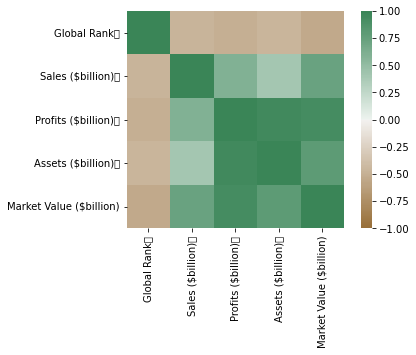

In [75]:
#Heatmap, visualizing correlation.
axis_corr = sns.heatmap(corr, vmin = -1, vmax=1, center = 0, cmap = sns.diverging_palette(50, 500, n=500), square=True)
axis_corr
